In [1]:
#Understanding the data

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# avoide Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the data from csv file

data = pd.read_csv('day.csv')

In [5]:
#  head of the dataset
 
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking the shape of dataframe

data.shape

(730, 16)

In [7]:
# describing the columns of dataframe

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# info about columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# checking for the null values in column data

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# renaming few columns for better ubderstanding

data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [11]:
data.head(10)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
data.shape

(730, 16)

In [13]:
# dropping the duplicates

data.drop_duplicates(inplace=True)

In [14]:
data.shape

(730, 16)

In [15]:
#shape is same so that means there are no duplicates in the original dataframe as well.

In [16]:
# dropping the unwanted columns
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [17]:
# Encoding/mapping the season column

data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [18]:
# Encoding/mapping the month column

data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [19]:
# Encoding/mapping the weekday column

data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [20]:
# Encoding/mapping the weathersit column

data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [21]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


# Visualising the Data

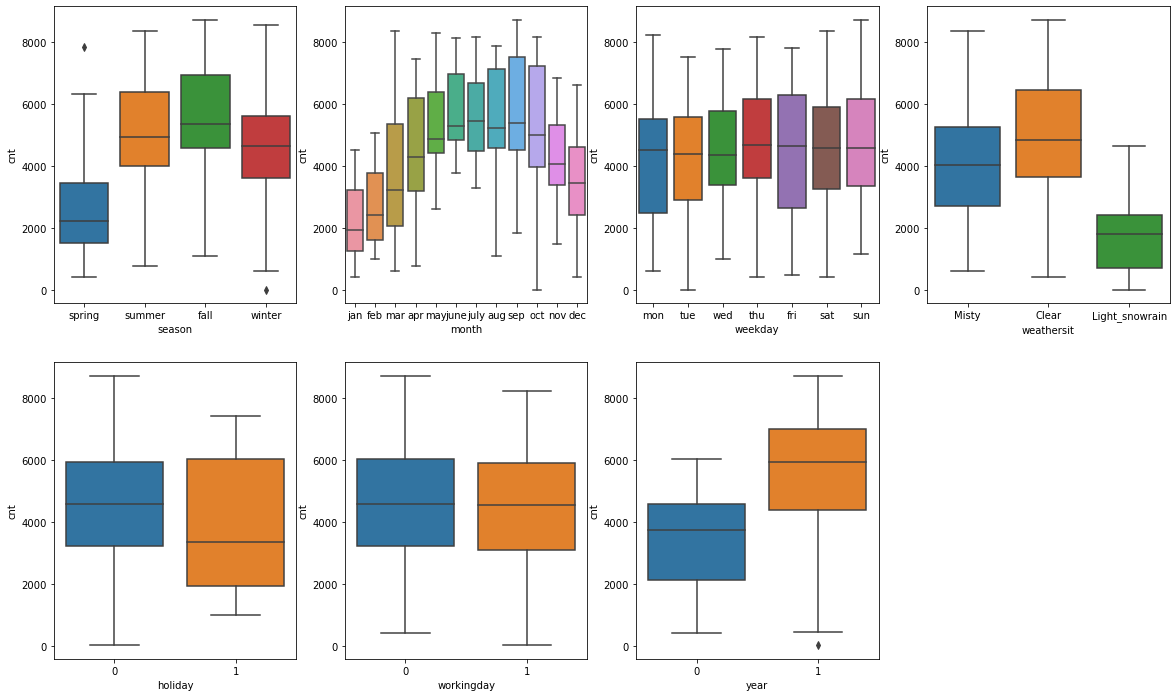

In [23]:
# visualizing the categorical columns
#  how predictor variable stands against the target variable


plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.show()

In [24]:
#  create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (10,7))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=data, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

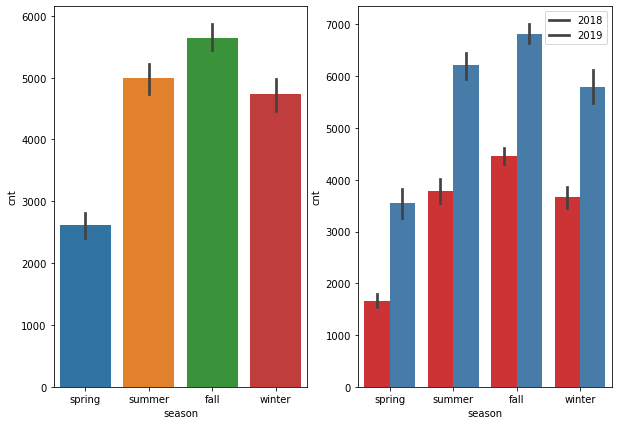

In [25]:
# plotting visualization for season column

plot_cat_columns('season')

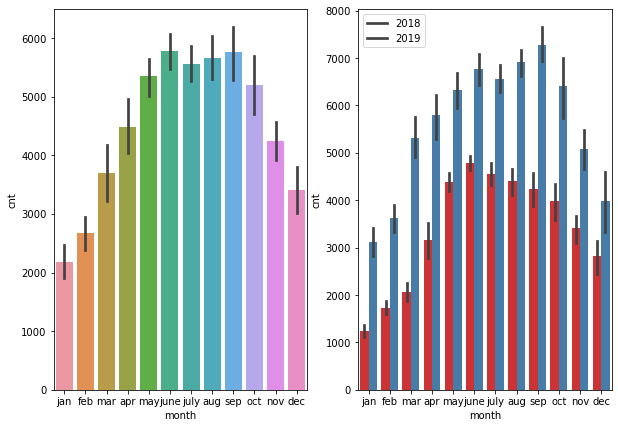

In [26]:
# plotting visualization for month column

plot_cat_columns('month')

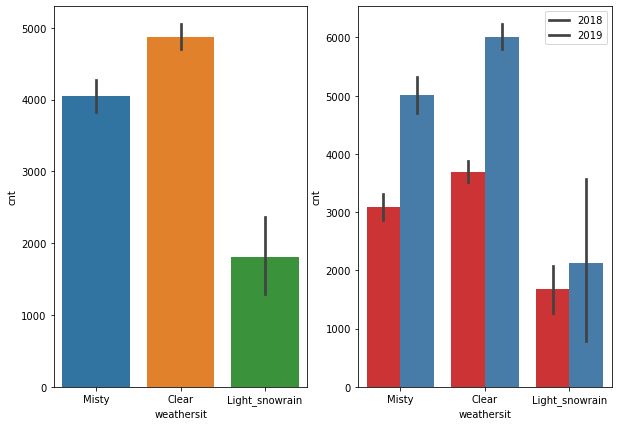

In [27]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

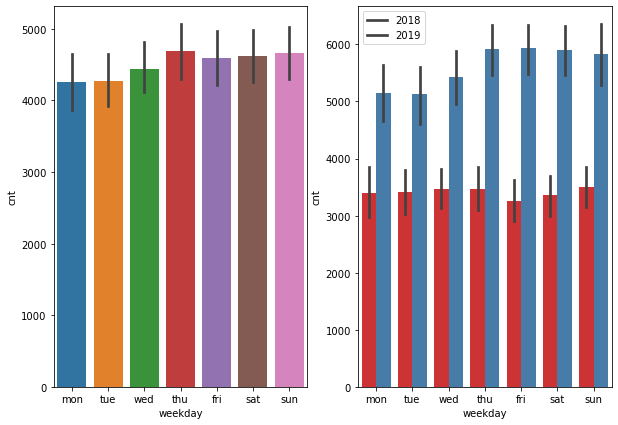

In [28]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

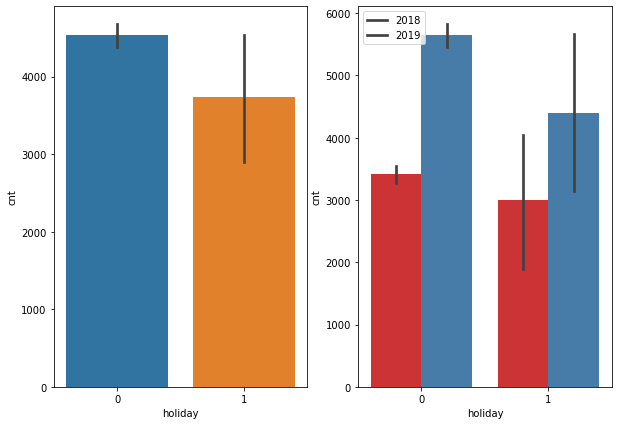

In [29]:
# plotting visualization for holiday column

plot_cat_columns('holiday')


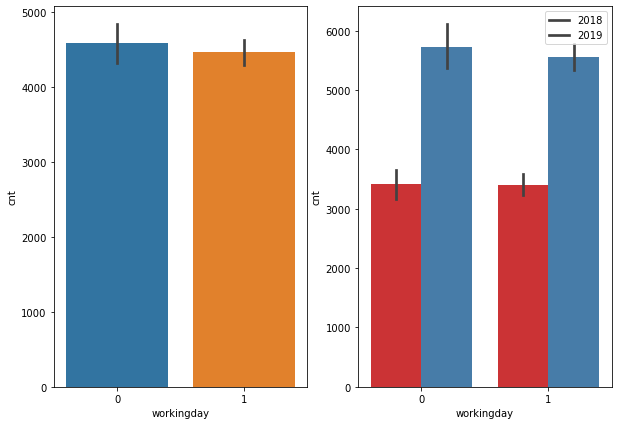

In [30]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

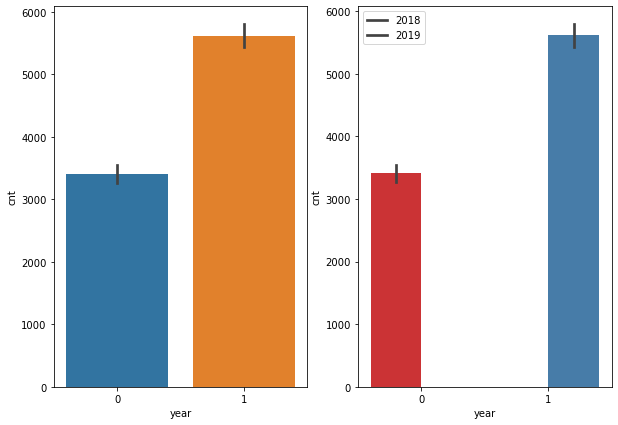

In [31]:
# plotting visualization for year column

plot_cat_columns('year')

In [32]:

#in 2019 there are more number of booking from the previous year, which shows good progress in terms of business.

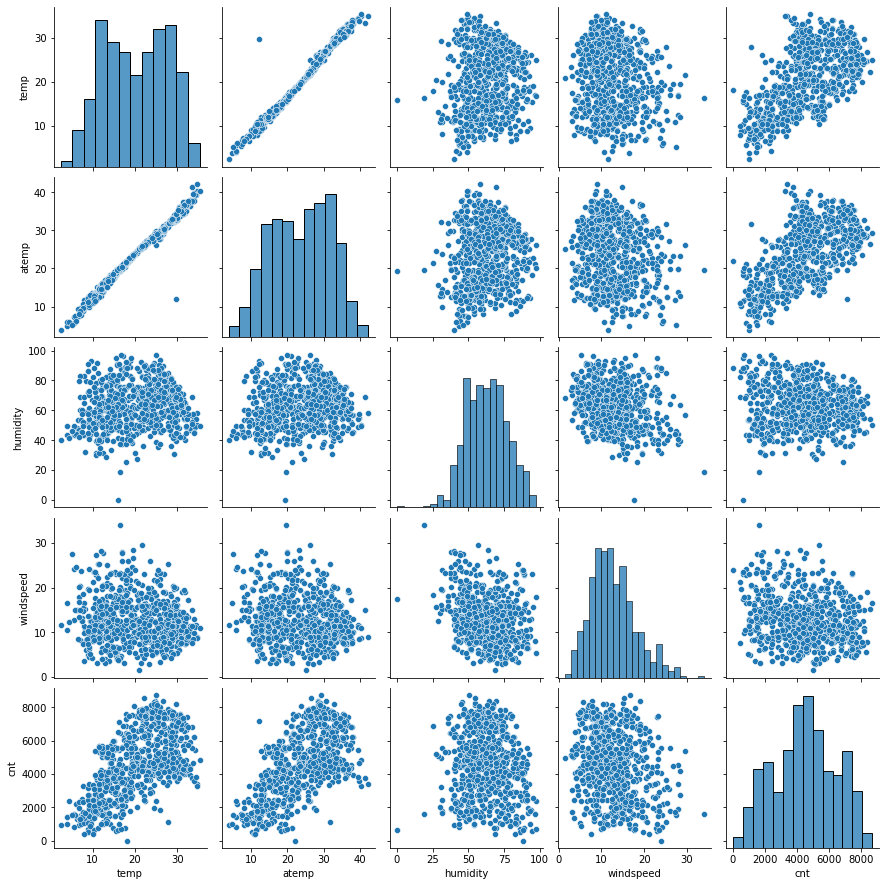

In [33]:
#visualizing the numerical columns

sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

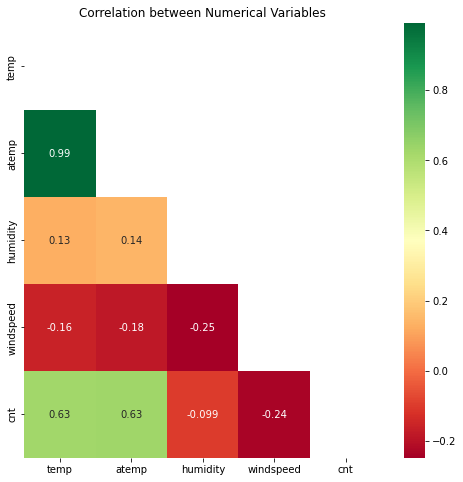

In [34]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (8,8))
matrix = np.triu(data[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [35]:
# as per above graph we can see that there is linear relation ship between temp and atemp further will decide which to keep 

# Data Preparation

In [36]:
seasons = pd.get_dummies(data['season'],drop_first=True)

working_day = pd.get_dummies(data['workingday'],drop_first=True)

weather= pd.get_dummies(data['weathersit'],drop_first=True)

month= pd.get_dummies(data['month'],drop_first=True)

week_day= pd.get_dummies(data['weekday'],drop_first=True)

In [37]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Merging  the dataframe, with the dummy variable dataset. 

data_new = pd.concat([data,month,week_day,weather,seasons],axis=1)

In [39]:
data_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [40]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [41]:
# dropping unnecessary columns.

data_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [42]:
data_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
data_new.shape

(730, 30)

# Data into Training and Testing Sets

In [44]:
# splitting the dataframe into Train and Test

np.random.seed(0)
data_new_train, data_new_test = train_test_split(data_new, train_size = 0.7, random_state = 100)

In [45]:
data_new_train.shape

(510, 30)

In [46]:
data_new_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    int64  
 8   aug             510 non-null    uint8  
 9   dec             510 non-null    uint8  
 10  feb             510 non-null    uint8  
 11  jan             510 non-null    uint8  
 12  july            510 non-null    uint8  
 13  june            510 non-null    uint8  
 14  mar             510 non-null    uint8  
 15  may             510 non-null    uint8  
 16  nov             510 non-null    uint8  
 17  oct             510 non-null    u

In [47]:
data_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   humidity        220 non-null    float64
 6   windspeed       220 non-null    float64
 7   cnt             220 non-null    int64  
 8   aug             220 non-null    uint8  
 9   dec             220 non-null    uint8  
 10  feb             220 non-null    uint8  
 11  jan             220 non-null    uint8  
 12  july            220 non-null    uint8  
 13  june            220 non-null    uint8  
 14  mar             220 non-null    uint8  
 15  may             220 non-null    uint8  
 16  nov             220 non-null    uint8  
 17  oct             220 non-null    u

In [48]:
data_new_test.shape

(220, 30)

In [49]:
scaler = MinMaxScaler()

In [50]:
data_new_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [51]:
#Using scaler to all columns

In [52]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
data_new_train[num_vars] = scaler.fit_transform(data_new_train[num_vars])

In [53]:
data_new_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


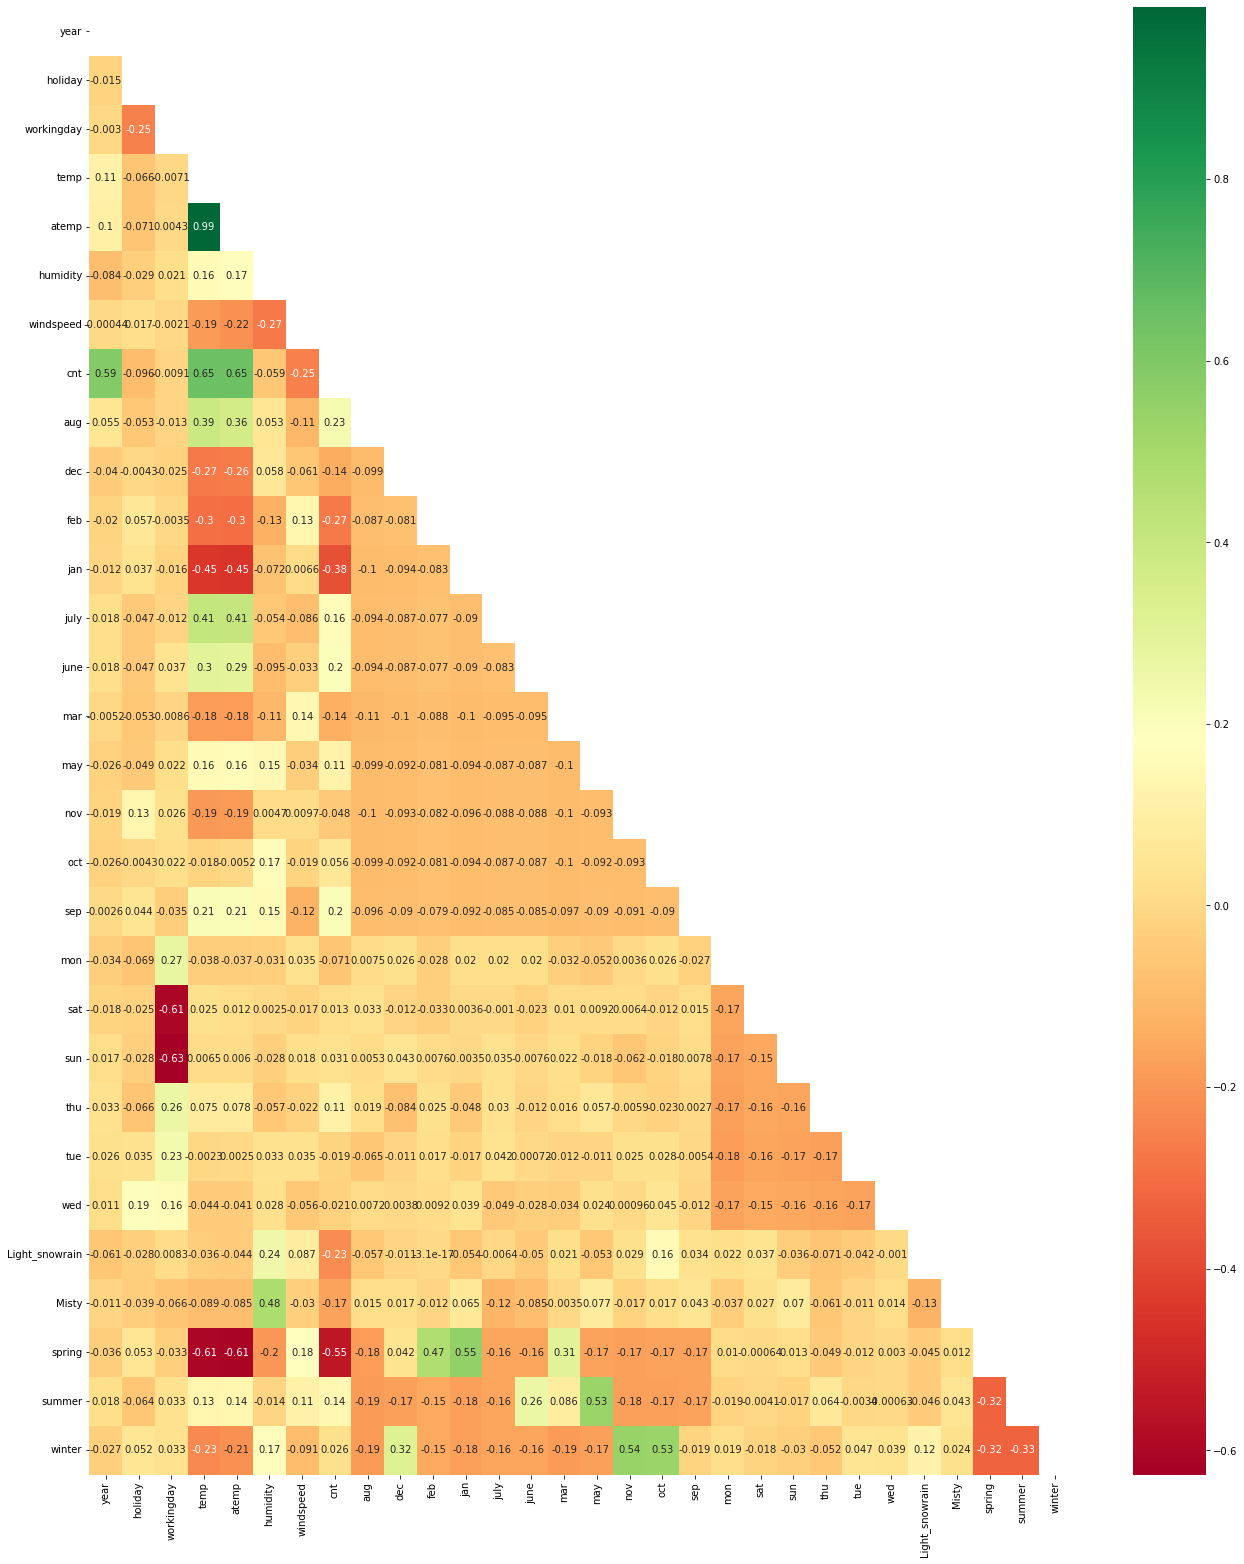

In [54]:
#Check which variable are highly corelated

plt.figure(figsize = (22,27))
matrix = np.triu(data_new_train.corr())
sns.heatmap(data_new_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

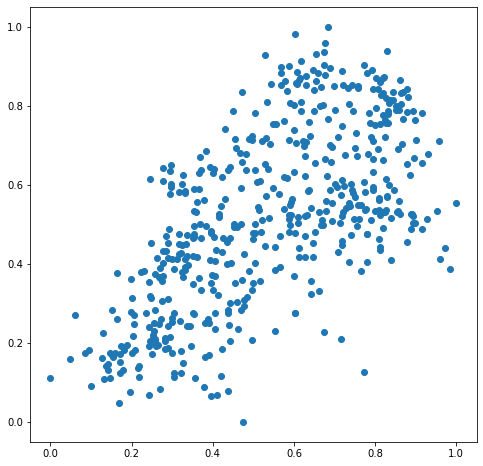

In [55]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[8,8])
plt.scatter(data_new_train.temp, data_new_train.cnt)
plt.show()

In [56]:
#it show positive correlation between temp and cnt as per graph

In [57]:
# Building the Linear Model

y_train = data_new_train.pop('cnt')
X_train = data_new_train

In [58]:
y_train.shape

(510,)

In [59]:
X_train.shape

(510, 29)

In [60]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # show top 15 list

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [62]:
#  selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [63]:
#  columns has been rejected or not 

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [64]:
# nowcalculate VIF of variables


def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif  

In [65]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [66]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


In [67]:
from patsy import dmatrices

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Building a linear model

In [68]:
#  1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        11:57:13   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [69]:
#  humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


In [70]:
#as per thee above value VIF seem good now

In [71]:
# now we will check for 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          4.75e-186
Time:                        11:57:15   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [72]:
# nov has high p value  so drop
X_train_new = X_train_new.drop(['nov'], axis = 1)

#  calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


In [73]:
# now we are going for  3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          2.74e-186
Time:                        11:57:16   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [74]:
# we can see that dec has the higher p valu so we drop
X_train_new = X_train_new.drop(['dec'], axis = 1)

#  calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [75]:
# we will check for 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          8.14e-187
Time:                        11:57:17   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [76]:
#  we can see that jan hass the highest p valu so drop
X_train_new = X_train_new.drop(['jan'], axis = 1)

#  calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [77]:
# noow will check for 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          5.06e-187
Time:                        11:57:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [78]:
#  we can see that july has the highest p value so drop
X_train_new = X_train_new.drop(['july'], axis = 1)

#  calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [79]:
# Now VIF is showing lower that 5 

In [80]:
# now will check for 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          1.47e-186
Time:                        11:57:19   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

In [81]:
# now we can check  parameters and their coefficient values
lr_6.params


const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

# Residual Analysis of the train data and validation

In [82]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [83]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

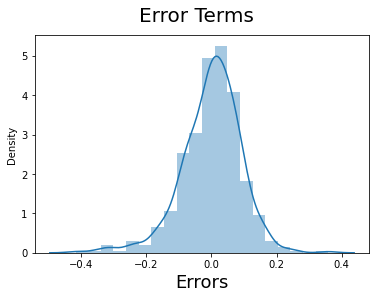

In [84]:
#now we are Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [85]:
# as per the graph we can say that its normal distribution

# Checking for Multi Colinearity

In [86]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


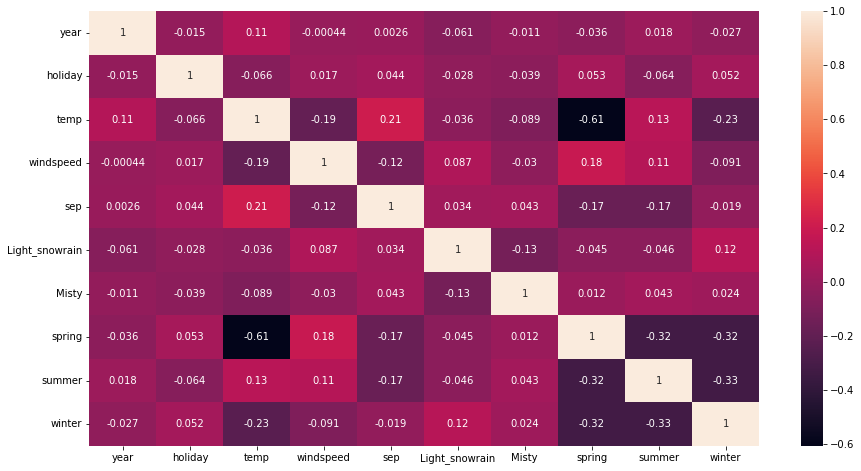

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

In [88]:
# VIF value is less than 5 as we can see

# Checking for Linearity

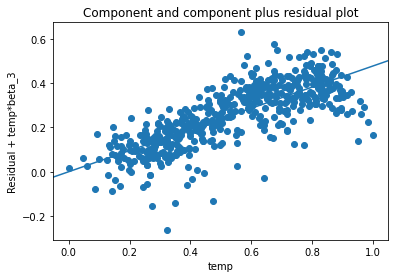

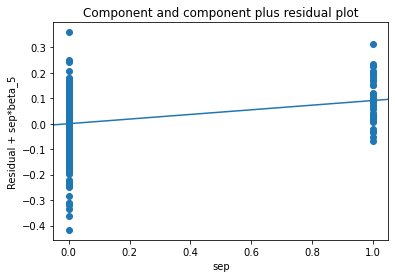

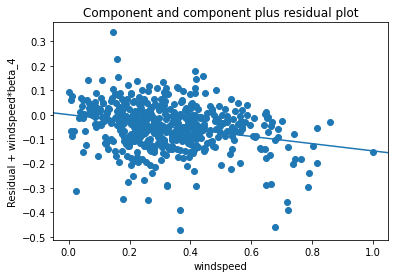

In [89]:
# checking Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

In [90]:
# above graph show the linearity 

# we can study now Homoscedasticity

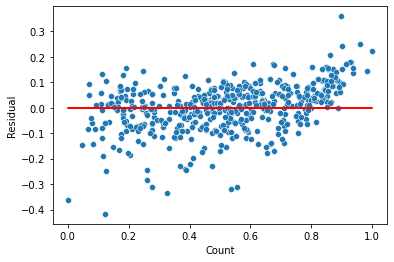

In [91]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [92]:
# as per above graph we can see that no visible pattern observed

In [93]:
#Independence of residuals
#Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

# Predictions Using the Final Model

In [94]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
data_new_test[num_vars] = scaler.transform(data_new_test[num_vars])
data_new_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [95]:
data_new_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
y_test = data_new_test.pop('cnt')
X_test = data_new_test

In [97]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [98]:

y_pred = lr_6.predict(X_test_lm_6)

In [99]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

# Model Evaluation

In [100]:
# now we will draw a graph of actual vs prediction value

Text(0, 0.5, 'y_pred')

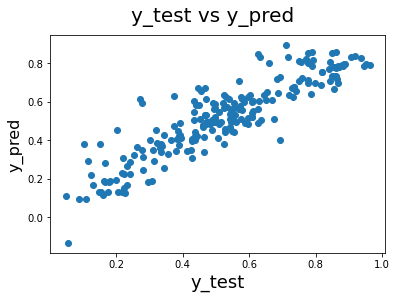

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [102]:
round(lr_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [103]:
# now calculate the adjusted R^ 2 value

In [104]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


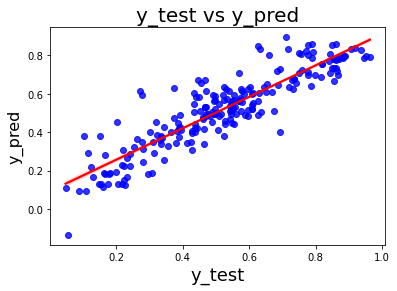

In [105]:
#  fitting on the test data
#  Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Observation on Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944

In [106]:
#Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.